In [1]:
import pandas as pd
import numpy as np
from Higgs.tools.ImplementationUtils import (
    implementChannelLimit,
    fromHB5Table1,
    readHEPDataCsv,
)
from Higgs import bounds as HB
from Higgs.tools.LimitValidation import validateChannelLimit
import os, sys

sys.path.insert(0, os.path.dirname(os.path.dirname(os.getcwd())))
import MassResolutions as resolution


# CMS 13TeV LHC

## `vbfH > WW` [1912.01594](https://arxiv.org/abs/1912.01594)

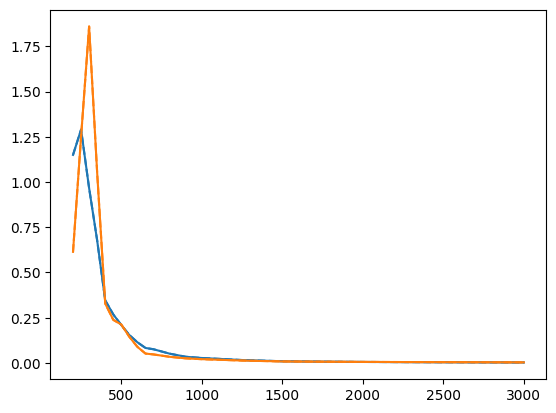

Looks good. Saving this to vbfH_LHC13_CMS_36.json


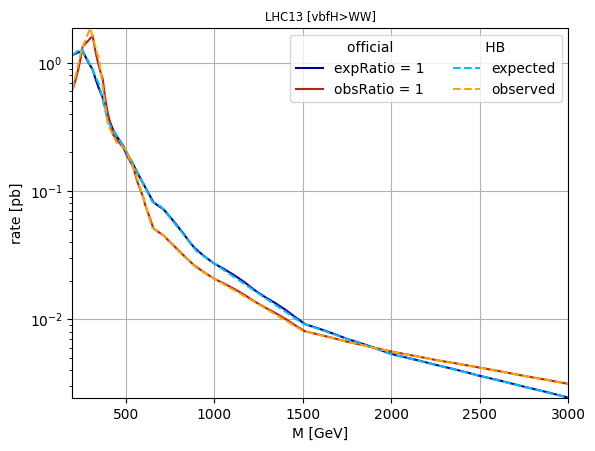

In [2]:
df = pd.DataFrame(
    {
        "m": np.concatenate(
            (
                np.arange(200, 700, 50),
                np.arange(700, 1000, 100),
                np.arange(1000, 3001, 250),
            )
        ),
        "obs": [
            0.614,
            1.25,
            1.86,
            1.05,
            0.328,
            0.238,
            0.212,
            0.144,
            0.0886,
            0.0517,
            0.0469,
            0.0338,
            0.0252,
            0.0207,
            0.0131,
            0.00813,
            0.00669,
            0.00560,
            0.00482,
            0.00420,
            0.00362,
            0.00314,
        ],
        "exp": [
            1.15,
            1.29,
            0.966,
            0.677,
            0.346,
            0.268,
            0.209,
            0.154,
            0.114,
            0.0827,
            0.0755,
            0.0511,
            0.0340,
            0.0272,
            0.0159,
            0.00928,
            0.00704,
            0.00535,
            0.00442,
            0.00362,
            0.00298,
            0.00245,
        ],
    }
)

limitFile = implementChannelLimit(
    "1912.01594",
    {"channels": [["vbfH", "WW"]]},
    "Fig. 6 (bottom-right)",
    df,
    idSuffix=2,
    massResolution=resolution.WW["qqlnu"],
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


## `pp > H > WW` [1912.01594](https://arxiv.org/abs/1912.01594)
floating VBF fraction

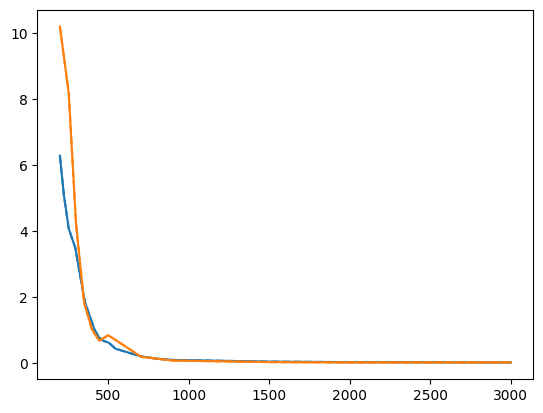

Looks good. Saving this to comb_LHC13_CMS_36.json


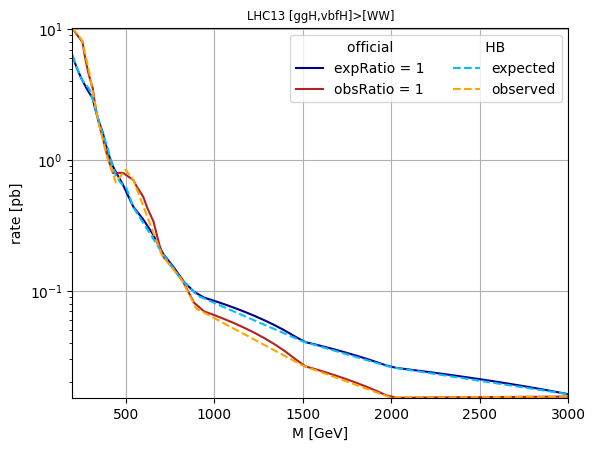

In [3]:
df = fromHB5Table1("170332_CMS_gg-H-WW_13TeV_35.9fb-1", "CMS")
process = {
    "channels": [
        ["ggH", "WW"],
        ["vbfH", "WW"],
    ],
}
limitFile = implementChannelLimit(
    "1912.01594",
    process,
    "Fig. 6 (top-right)",
    df,
    idSuffix=1,
    massResolution=resolution.WW["qqlnu"],
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)

## `gg > H > WW` [2109.06055](https://arxiv.org/abs/2109.06055)
Using the Radion limit

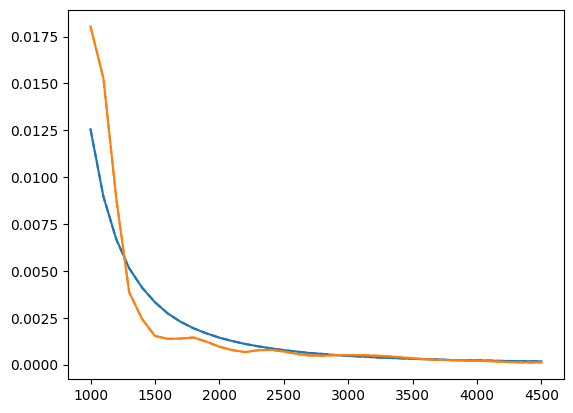

Looks good. Saving this to ggH_highM_LHC13_CMS_137.json


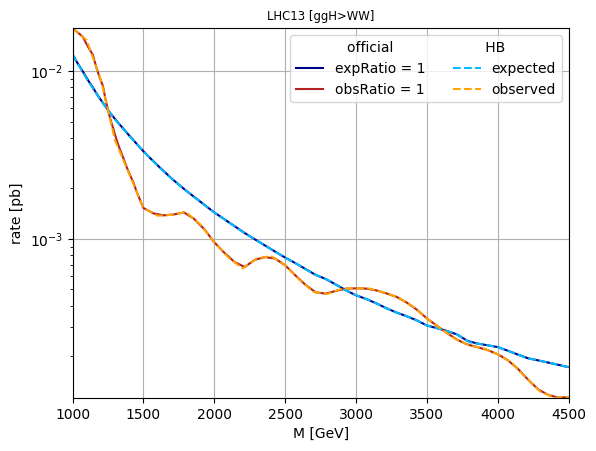

In [4]:
dfs = readHEPDataCsv(
    "https://www.hepdata.net/download/table/ins1920983/Figure%207%20a/1/csv"
)
df = dfs[0].rename(
    columns={
        "Radion mass [GeV]": "m",
        "Cross section upper limit at 95% CL [pb]": "obs",
    }
)
df["exp"] = dfs[1]["Cross section upper limit at 95% CL [pb]"]

limitFile = implementChannelLimit(
    "2109.06055",
    {"channels": [["ggH", "WW"]]},
    "https://doi.org/10.17182/hepdata.102645.v1/t3",
    df,
    idSuffix=1,
    massResolution={"absolute": 50, "relative": 0.01},  # p. 8
    prefix="ggH_highM",
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


## `vbfH > WW` [2109.06055](https://arxiv.org/abs/2109.06055)
Using the Radion limit

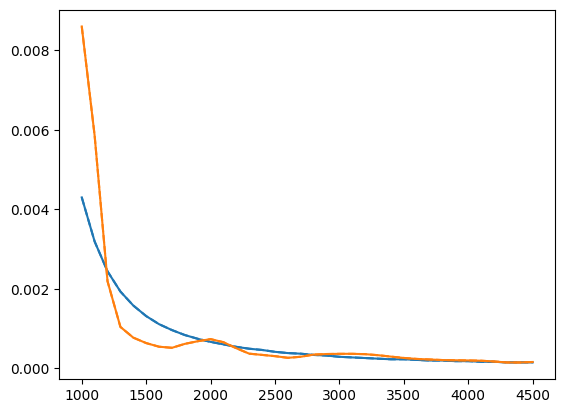

Looks good. Saving this to vbfH_highM_LHC13_CMS_137.json


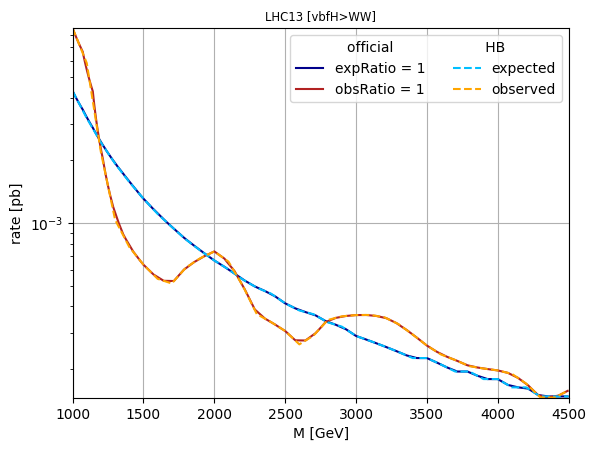

In [5]:
dfs = readHEPDataCsv(
    "https://www.hepdata.net/download/table/ins1920983/Figure%207%20b/1/csv"
)
df = dfs[0].rename(
    columns={
        "Radion mass [GeV]": "m",
        "Cross section upper limit at 95% CL [pb]": "obs",
    }
)
df["exp"] = dfs[1]["Cross section upper limit at 95% CL [pb]"]

limitFile = implementChannelLimit(
    "2109.06055",
    {"channels": [["vbfH", "WW"]]},
    "https://doi.org/10.17182/hepdata.102645.v1/t4",
    df,
    idSuffix=2,
    massResolution={"absolute": 50, "relative": 0.01},  # p. 8
    prefix="vbfH_highM",
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


# CMS 8TeV LHC

## `vbfH>WW` full Run1 [CMS-PAS-HIG-13-022](https://cds.cern.ch/record/1590404?ln=en)
Implementing the conf note, because no combination of the channels and thus no corresponding paper was ever done by CMS


No arxiv eprint found.
Multiple different luminosity values: [19.5, 4.9] using 19.5 unless you set it manually


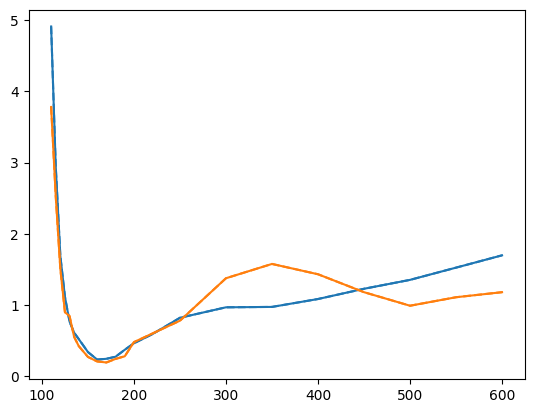

Looks good. Saving this to vbfH_LHC8_CMS_24.json
using effective coupling input for SM-normalized limit


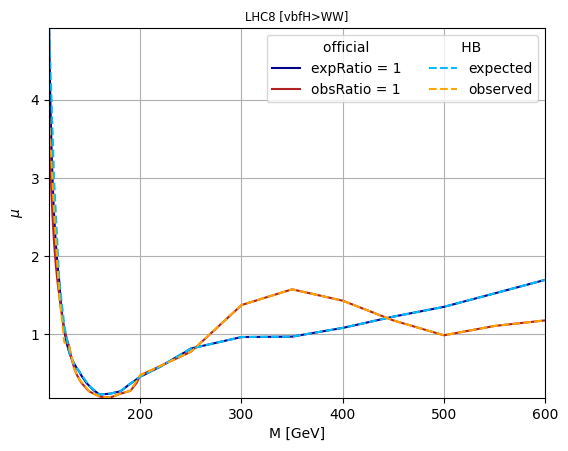

In [6]:
df = fromHB5Table1("13022_CMS_VBF-WW_25.4fb-1", "CMS")
limitFile = implementChannelLimit(
    1260868,
    {"channels": [["vbfH", "WW"]]},
    "Fig. 5 (top-left)",
    df,
    massResolution=resolution.WW["2l2nu"],
    luminosity=4.9 + 19.5,
    normalization={"reference": "SMHiggsInterp", "process": "signal"},
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


## CMS `WH>3W` full Run1 [CMS-PAS-HIG-13-009](https://cds.cern.ch/record/1523681?ln=en)
Implementing the conf note, because no combination of the channels and thus no corresponding paper was ever done by CMS. Also this is the only limit in this channel.

No arxiv eprint found.
Multiple different luminosity values: [19.5, 4.9] using 19.5 unless you set it manually


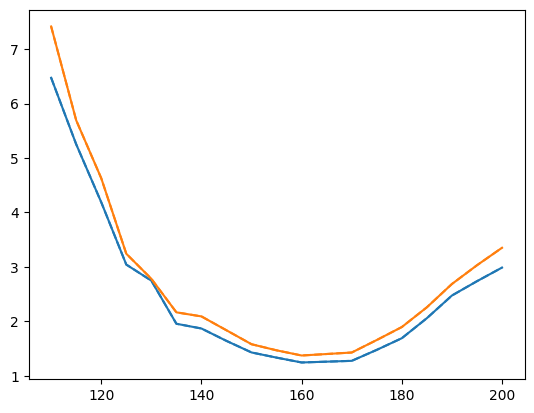

Looks good. Saving this to HW_LHC8_CMS_24.json
using effective coupling input for SM-normalized limit


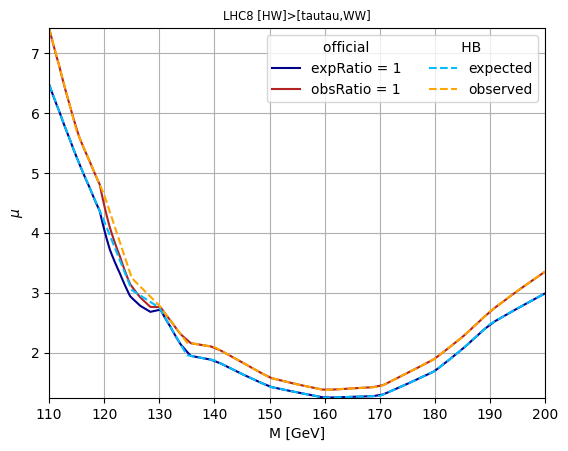

In [7]:
df = fromHB5Table1("13009_CMS_WH-WWW_25fb-1", "CMS")
limitFile = implementChannelLimit(
    1230241,
    {"channels": [["HW", "WW"], ["HW", "tautau"]]},
    "Fig. 6",
    df,
    constraints={"modelLike": "SMHiggs", "process": "signal"},
    massResolution=resolution.WW["2l2nu"],
    luminosity=4.9 + 19.5,
    normalization={"reference": "SMHiggsInterp", "process": "signal"},
    collider="LHC8",
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


## CMS `H>WW>2l2nu` full Run1 [CMS-PAS-HIG-13-003](https://cds.cern.ch/record/1523673?ln=en)

Implementing the conf note, because no combination of the channels and thus no corresponding paper was ever done by CMS.

No arxiv eprint found.
Multiple different luminosity values: [19.5, 4.9] using 19.5 unless you set it manually


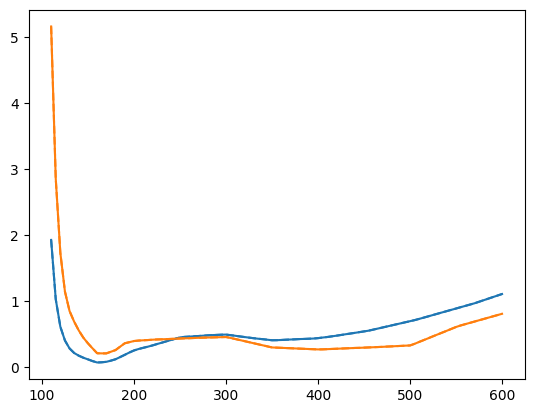

Looks good. Saving this to H_LHC8_CMS_24.json
using effective coupling input for SM-normalized limit


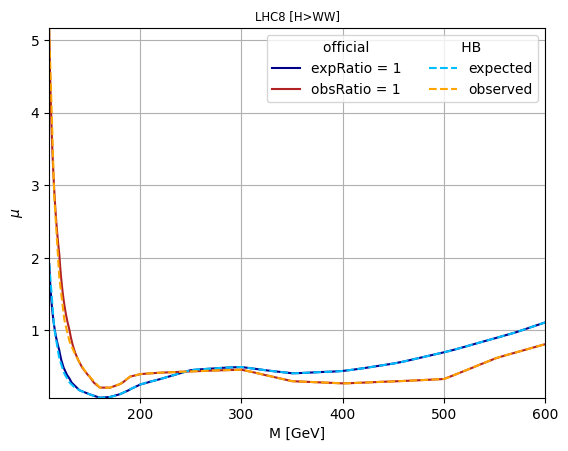

In [8]:
df = fromHB5Table1("13003_CMS_H-WW-lnulnu_25fb-1", "CMS")
limitFile = implementChannelLimit(
    1230243,
    {"channels": [["H", "WW"]]},
    "Fig. 8 (right)",
    df,
    massResolution=resolution.WW["2l2nu"],
    luminosity=4.9 + 19.5,
    normalization={"reference": "SMHiggsInterp", "process": "signal"},
    collider="LHC8",
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


## CMS `H>WW>qqlnu` full Run1 [CMS-PAS-HIG-13-027](http://cds.cern.ch/record/1743804)
Implementing the conf note, because no combination of the channels and thus no corresponding paper was ever done by CMS.

No arxiv eprint found.


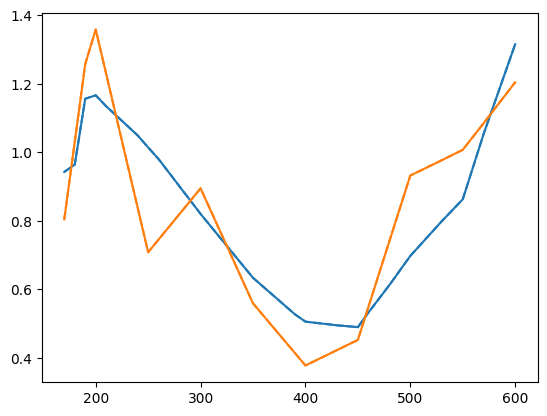

Looks good. Saving this to partComb_LHC8_CMS_24.json
using effective coupling input for SM-normalized limit


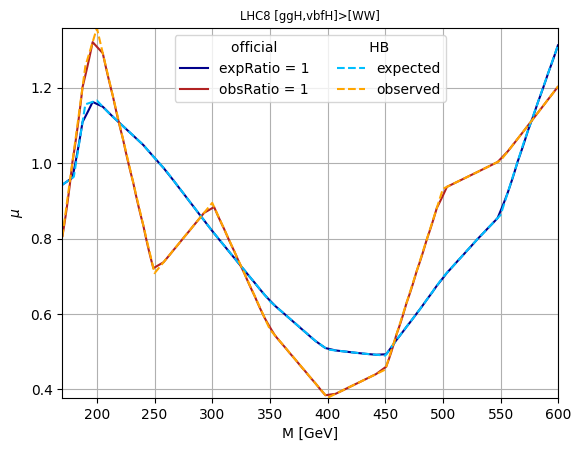

In [9]:
df = fromHB5Table1("13027_CMS_H-WW-lnujj_24.3fb-1", "CMS")
limitFile = implementChannelLimit(
    1306813,
    {"channels": [["ggH", "WW"], ["vbfH", "WW"]]},  # b-jet and additional lepton veto
    "Fig. 6 (right)",
    df,
    constraints={"modelLike": "SMHiggs", "process": "signal"},
    massResolution=resolution.WW["qqlnu"],
    luminosity=24.3,
    normalization={"reference": "SMHiggsInterp", "process": "signal"},
    collider="LHC8",
    prefix="partComb"
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


## CMS SM WW combination full Run1 [1312.1129](https://arxiv.org/abs/1312.1129)

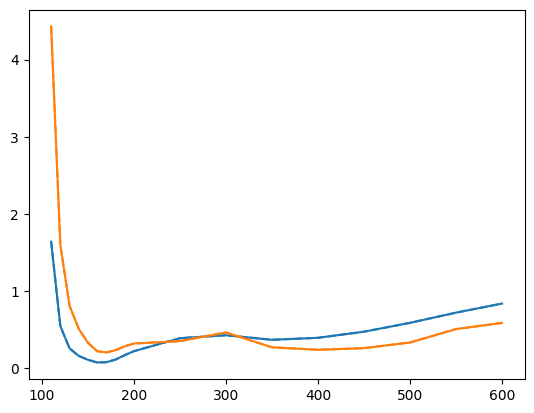

Looks good. Saving this to comb_LHC8_CMS_24.json
using effective coupling input for SM-normalized limit


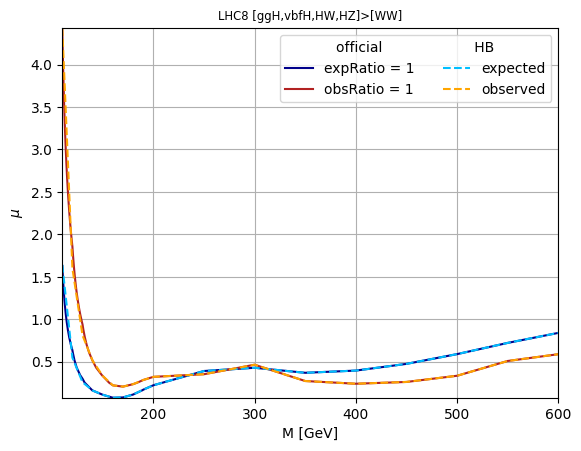

In [10]:
df = pd.DataFrame(
    data={
        "m": np.concatenate([np.arange(110, 200, 10), np.arange(200, 601, 50)]),
        "obs": [
            4.43,
            1.6,
            0.81,
            0.51,
            0.331,
            0.221,
            0.206,
            0.235,
            0.284,
            0.321,
            0.352,
            0.464,
            0.272,
            0.24,
            0.261,
            0.334,
            0.508,
            0.588,
        ],
        "exp": [
            1.64,
            0.547,
            0.258,
            0.16,
            0.11,
            0.0752,
            0.0789,
            0.113,
            0.17,
            0.222,
            0.39,
            0.428,
            0.369,
            0.395,
            0.474,
            0.589,
            0.721,
            0.839,
        ],
    }
)
# theres a b-jet veto
process = {
    "channels": [
        ["ggH", "WW"],
        ["vbfH", "WW"],
        ["HZ", "WW"],
        ["HW", "WW"],
    ],
}
limitFile = implementChannelLimit(
    "1312.1129",
    process,
    "Fig. 21 (left)",
    df,
    constraints={"modelLike": "SMHiggs", "process": "signal"},
    massResolution=resolution.WW["2l2nu"],
    luminosity=4.9 + 19.4,
    normalization={"reference": "SMHiggsInterp", "process": "signal"},
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)
